In [54]:
import scvelo as scv;

In [55]:
import scanpy as sc

In [56]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;


In [57]:
adata = sc.read(f'analysis_noKO.h5ad')

In [58]:
adata

AnnData object with n_obs × n_vars = 23167 × 17308
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.4', 'seurat_clusters', 'label', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous'
    var: 'name'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [59]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 15767 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.


In [60]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [61]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [62]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/104 cores)
    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


figure cannot be saved as pdf, using png instead.
saving figure to file ./figures/scvelo_1122.png


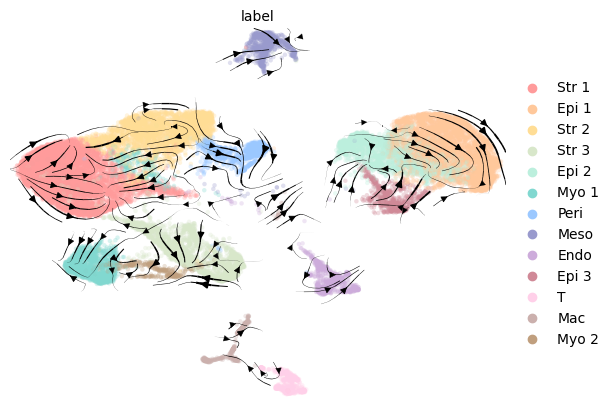

In [78]:
scv.pl.velocity_embedding_stream(adata,basis='umap',color = "label",
                                 palette = ['#ff9b9b','#ffc89b','#ffdd95','#d8e7ca',
                                            '#bcefdd','#81d8d0','#9bc8ff','#999acd',
                                            '#cdacdb','#d08997','#ffd0e9','#cbb0ad','#c09f7e'],legend_loc ='right margin',save = '1122.pdf')

In [66]:
key = ["Str_1", "Epi_1", "Str_2", "Str_3", "Epi_2", "Myo_1",  "Peri", "Meso", "Endo","Epi_3","T", "Mac", "Myo_2"]

In [70]:
test = sorted(adata.obs['label'], key=["Str_1", "Epi_1", "Str_2", "Str_3", "Epi_2", "Myo_1",  "Peri", "Meso", "Endo","Epi_3","T", "Mac", "Myo_2"])

TypeError: 'list' object is not callable

In [68]:
test= adata.obs['label']

AACACACAGGGTAGTCCAGGCGGATAA_1    Str_1
AACACACAGACGTTACGATGTCACGCT_1    Str_1
AACACACAGGCAACTTCAGGCGGATAA_1    Str_1
AACACACAGCTAACCAGACACCTAACG_1     Meso
AACACACAGGGTGATCAGCTGGTTGAG_1    Str_2
                                 ...  
TGTGGACACACCGTACTCGAACACAGA_4    Epi_1
TGTGGACACCGGCTAGATATTCGAGCT_4    Epi_1
TGTGGACACGCTTACAGGCTGTTCGGT_4    Str_1
TGTGGACACCTAATCGCGACCTGAAGG_4    Epi_2
TGTGGACACTGGTCAGTTACAGGCATC_4    Str_3
Name: label, Length: 23167, dtype: category
Categories (13, object): ['Endo', 'Epi_1', 'Epi_2', 'Epi_3', ..., 'Str_1', 'Str_2', 'Str_3', 'T']

In [72]:
test = pd.Categorical(adata.obs['label'],
                      categories=["Str_1", "Epi_1", "Str_2", "Str_3", 
                                  "Epi_2", "Myo_1",  "Peri", "Meso", "Endo",
                                  "Epi_3","T", "Mac", "Myo_2"])

In [74]:
adata.obs['label'] = test

In [75]:
adata.obs['label']

AACACACAGGGTAGTCCAGGCGGATAA_1    Str_1
AACACACAGACGTTACGATGTCACGCT_1    Str_1
AACACACAGGCAACTTCAGGCGGATAA_1    Str_1
AACACACAGCTAACCAGACACCTAACG_1     Meso
AACACACAGGGTGATCAGCTGGTTGAG_1    Str_2
                                 ...  
TGTGGACACACCGTACTCGAACACAGA_4    Epi_1
TGTGGACACCGGCTAGATATTCGAGCT_4    Epi_1
TGTGGACACGCTTACAGGCTGTTCGGT_4    Str_1
TGTGGACACCTAATCGCGACCTGAAGG_4    Epi_2
TGTGGACACTGGTCAGTTACAGGCATC_4    Str_3
Name: label, Length: 23167, dtype: category
Categories (13, object): ['Str_1', 'Epi_1', 'Str_2', 'Str_3', ..., 'Epi_3', 'T', 'Mac', 'Myo_2']

saving figure to file ./figures/scvelo_scvel0_noKO.pdf


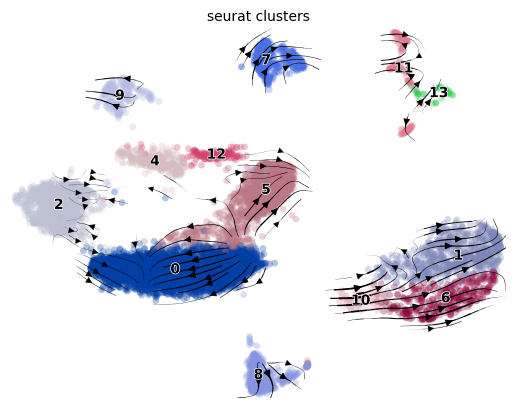

In [12]:
scv.pl.velocity_embedding_stream(adata,basis='umap',color="seurat_clusters",save="scvel0_noKO.pdf")